In [17]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.gpu_device_name()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10136752412068703166
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2578304669301653501
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


'/device:GPU:0'

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
# channel_first
#x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
#x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

# channel_last
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 타입 변경
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
model = Sequential()
# output filter의 개수, filter size
# 28 x 28(input filter) -> (128, 26, 26, 32) # 26 = (28-3+1)
# valid, same(28, 28) : 모서리 특징
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation="relu"))
# 128, 24, 24, 64
model.add(MaxPooling2D(pool_size=(2,2))) # 128, 12, 12, 64
model.add(Dropout(0.25))
model.add(Flatten()) # 12 x 12 x 64 =>1차원 9216
# FFNN, FC(Fully-connected)
model.add(Dense(128, activation="relu")) # 9216 x 128
# 128 x 128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation="softmax")) # 128 x 10

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.2590 - accuracy: 0.9197 - val_loss: 0.0575 - val_accuracy: 0.9814
Epoch 2/12
60000/60000 [==============================] - 49s 825us/step - loss: 0.0872 - accuracy: 0.9742 - val_loss: 0.0361 - val_accuracy: 0.9889
Epoch 3/12
60000/60000 [==============================] - 50s 829us/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0325 - val_accuracy: 0.9880
Epoch 4/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0296 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0333 - val_accuracy: 0.9882
Epoch 6/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0265 - val_accuracy: 0.9910
Epoch 7/12
60000/60000 [==============================] 

In [35]:
# train, validation, test
# epoch마다 accuracy를 저장한다.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get("accuracy"))
        
history = AccuracyHistory()  # 인스턴스 해주고 아래 fit에 , callbacks에  history 지정한다.

model.fit(x_train, y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, verbose=0)
print(score[0])
print(score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 832us/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 2/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 3/12
60000/60000 [==============================] - 49s 823us/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 4/12
60000/60000 [==============================] - 50s 826us/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 5/12
60000/60000 [==============================] - 49s 823us/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 6/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [==============================] 

IndexError: list index out of range

In [36]:
# HDFS(Hadoop File System) : 모델 구조 전체 저장
# 가중치, 구조, Optimization statge 등이 저장
# json으로 저장 -> 구조와 가중치를 별도로 저장
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")

from keras.models import load_model

model = load_model("model_mnist.h5")
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)         

In [37]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_3
(None, 28, 28, 1)
<function relu at 0x00000217788921F8>
(None, 26, 26, 32)


C:\Users\ICT01_24\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


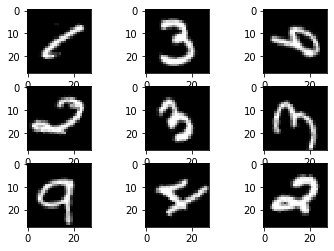

In [38]:
# imageDataGenerator
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# 이미지 백색화 => noise 제거(변수 간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(zca_whitening=True)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                     save_to_dir="images",
                                     save_prefix="aug",
                                     save_format="png"):
    
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28),
                     cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


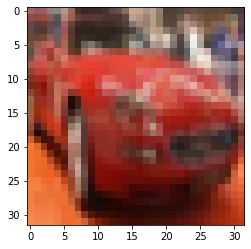

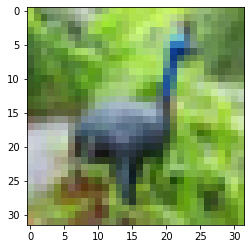

In [9]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [10]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [11]:
model = Sequential()
# residual망의 영향
# 32 x 32 x 3 => 32x32x32
model.add(Conv2D(32, kernel_size=3, padding="same", input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation("relu"))
model.add(Conv2D(32, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(Conv2D(64, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, 3, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_24\Anaconda3\envs\tf15_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [14]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/40





40000/40000 [==============================] - 11s 281us/step - loss: 1.8096 - acc: 0.3467 - val_loss: 1.3996 - val_acc: 0.5050
Epoch 2/40
40000/40000 [==============================] - 8s 200us/step - loss: 1.3290 - acc: 0.5266 - val_loss: 1.1727 - val_acc: 0.5897
Epoch 3/40
40000/40000 [==============================] - 8s 201us/step - loss: 1.1064 - acc: 0.6092 - val_loss: 1.1275 - val_acc: 0.5990
Epoch 4/40
40000/40000 [==============================] - 8s 200us/step - loss: 0.9714 - acc: 0.6622 - val_loss: 0.8776 - val_acc: 0.6946
Epoch 5/40
40000/40000 [==============================] - 8s 200us/step - loss: 0.8704 - acc: 0.6942 - val_loss: 0.9634 - val_acc: 0.6619
Epoch 6/40
40000/40000 [==============================] - 8s 201us/step - loss: 0.7965 - acc: 0.7227 - val_loss: 0.7723 - val_acc: 0.7292
Epoch 7/40
40000/40

In [15]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False, # 이미지 PCA 노이즈 제거
                             rotation_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(X_train)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
model.fit_generator(datagen.flow(X_test, Y_test,
                                 batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=NB_EPOCH,
                    verbose=VERBOSE)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

In [ ]:
# json
model_json = model.to_json()
open("cifar10_architecture.json", "w").write(model_json)
model.save_weights("cifar10_weights.h5", overwrite=True)

In [ ]:
from keras.models import model_from_json
json_file = open("cifar10_architecture.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print("Loaded model from disk")

In [ ]:
# accuracy graph를 출력해보시요.
# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해보시요.
